<a href="https://colab.research.google.com/github/ctctmusic/SARIMA-Sales-Forecasting-Gradio-Interface-/blob/main/Working_copy_of_project_4_SARMIA_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Sales Revenue Forecasting by Sales Channel
Objective: Forecast future sales revenue across different sales channels.

Value: Assists in budgeting, marketing strategy, and resource allocation.

Approach:
Aggregate sales data by Sales Channel and OrderDate.
Predict future revenue using time series forecasting techniques.
Consider factors like seasonality, promotions, and discounts.


# Exploratory Data Analysis

https://www.kaggle.com/datasets/talhabu/us-regional-sales-data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Applied AI_allWomen Tech/Module 3_Final Project/Data/Copy of US_Regional_Sales_Data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [6]:
len(df)

7991

In [7]:
df.shape

(7991, 16)

In [8]:
# Display the column names
df.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Price', 'Unit Cost'],
      dtype='object')

In [9]:
# Basic statistics of the dataset
df.describe()

,ProcuredDate,OrderDate,ShipDate,DeliveryDate,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
count,7991,7991,7991,7991,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,2019-05-29 05:11:01.794518784,2019-09-15 11:01:09.828557312,2019-09-30 15:04:26.249530624,2019-10-06 03:10:06.832686592,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394,2284.536504,1431.911054
min,2017-12-31 00:00:00,2018-05-31 00:00:00,2018-06-02 00:00:00,2018-06-07 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,167.500000,68.675000
25%,2018-10-27 00:00:00,2019-01-16 12:00:00,2019-01-31 00:00:00,2019-02-06 00:00:00,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,1031.800000,606.115500
50%,2019-05-15 00:00:00,2019-09-15 00:00:00,2019-09-30 00:00:00,2019-10-05 00:00:00,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1849.200000,1080.576000
75%,2020-03-10 00:00:00,2020-05-12 00:00:00,2020-05-28 00:00:00,2020-06-01 00:00:00,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,3611.300000,2040.250500
max,2020-09-26 00:00:00,2020-12-30 00:00:00,2021-01-24 00:00:00,2021-02-02 00:00:00,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,6566.000000,5498.556000
std,NaN,NaN,NaN,NaN,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570,1673.096364,1112.413043


In [10]:
# Check for missing values
df.isnull().sum()

,0
OrderNumber,0
Sales Channel,0
WarehouseCode,0
ProcuredDate,0
OrderDate,0
ShipDate,0
DeliveryDate,0
CurrencyCode,0
_SalesTeamID,0
_CustomerID,0


#Aggregate Data
##Find Monthly Sales


In [11]:
sales_df = pd.read_excel(file_path, sheet_name='Sales Orders Sheet')

# Step 1: Convert 'OrderDate' to datetime format
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])

# Step 2: Calculate Net Revenue per row (taking discount into account)
sales_df['Net Revenue'] = (
    sales_df['Order Quantity'] *
    sales_df['Unit Price'] *
    (1 - sales_df['Discount Applied'])
)

# Step 3: Group by OrderDate (monthly) and Sales Channel, then sum Net Revenue
monthly_revenue = (
    sales_df
    .groupby([pd.Grouper(key='OrderDate', freq='ME'), 'Sales Channel'])['Net Revenue']
    .sum()
    .reset_index()
    .sort_values('OrderDate')
)

monthly_revenue.head()


,OrderDate,Sales Channel,Net Revenue
0,2018-05-31,Distributor,14808.0050
1,2018-05-31,In-Store,21758.7525
2,2018-05-31,Online,15865.2650
3,2018-05-31,Wholesale,17204.2600
4,2018-06-30,Distributor,372569.5800


In [12]:
#Monthly Revenue by sales Channel
#aggregarted net revue by Sales Channel and Order Date (monthly)
monthly_revenue

,OrderDate,Sales Channel,Net Revenue
0,2018-05-31,Distributor,14808.0050
1,2018-05-31,In-Store,21758.7525
2,2018-05-31,Online,15865.2650
3,2018-05-31,Wholesale,17204.2600
4,2018-06-30,Distributor,372569.5800
...,...,...,...
123,2020-11-30,Wholesale,305131.5675
126,2020-12-31,Online,823273.8900
124,2020-12-31,Distributor,395248.5775
125,2020-12-31,In-Store,755364.0300


### Monthly Revenue by Sales Channel

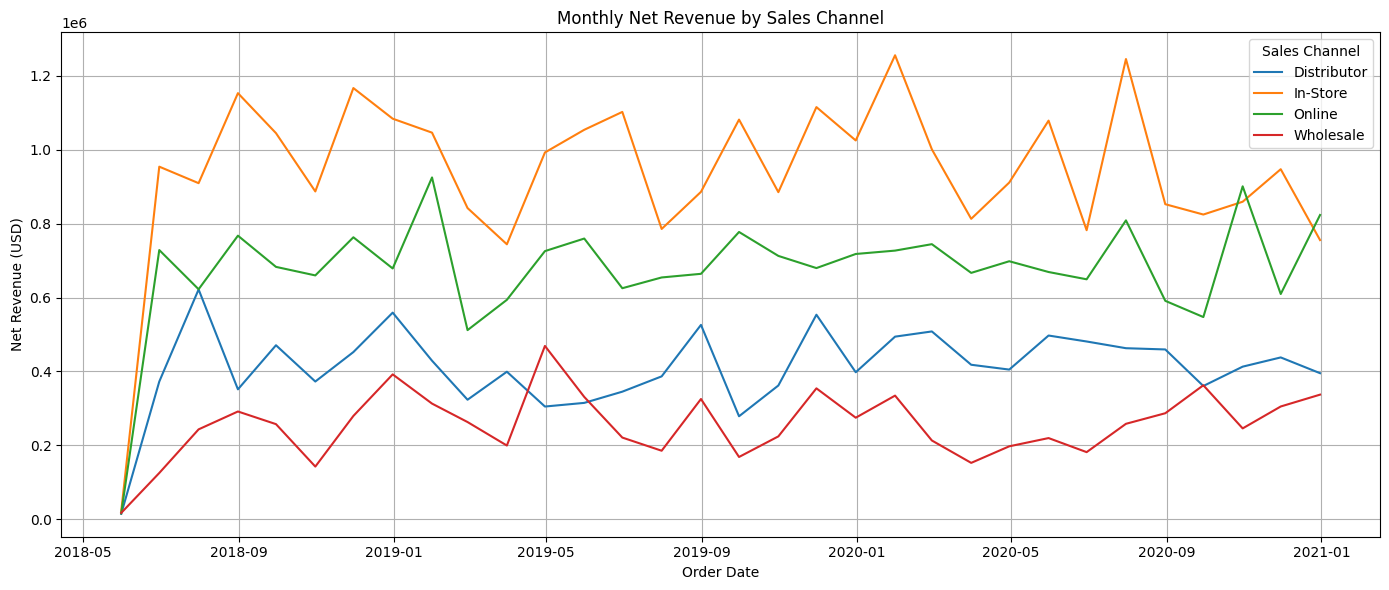

In [13]:
import matplotlib.pyplot as plt

# Plot monthly revenue for each Sales Channel
plt.figure(figsize=(14, 6))

# Loop through each unique Sales Channel and plot its revenue trend
for channel in monthly_revenue['Sales Channel'].unique():
    channel_data = monthly_revenue[monthly_revenue['Sales Channel'] == channel]
    plt.plot(channel_data['OrderDate'], channel_data['Net Revenue'], label=channel)

# Add plot title and labels
plt.title("Monthly Net Revenue by Sales Channel")
plt.xlabel("Order Date")
plt.ylabel("Net Revenue (USD)")

# Add legend and grid
plt.legend(title="Sales Channel")
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


# Prototype - SARIMA

Explanation of SARIMA Parameters:
Non-Seasonal ARIMA(p, d, q)
p: Autoregressive term (how many past values to use)

d: Differencing order (how many times to subtract previous values to make the series stationary)

q: Moving average term (how many past forecast errors to use)

Seasonal ARIMA(P, D, Q, S)
P: Seasonal autoregressive term

D: Seasonal differencing

Q: Seasonal moving average

S: Length of seasonal cycle → 4 here because it’s quarterly

So SARIMA(1,1,1)(1,1,1,4) captures both regular and quarterly seasonal patterns.

🛠 Why SARIMA?
SARIMA is great for:

Seasonal business data (like quarterly or monthly sales)

Short-to-medium range forecasts

Datasets with a consistent cycle (like 4 quarters in a year)

In [14]:
#Step 1: Load and prepare the data
import pandas as pd

def load_and_prepare_data(file_path, sheet_name='Sales Orders Sheet'):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df['OrderDate'] = pd.to_datetime(df['OrderDate'])
    df['Net Revenue'] = df['Order Quantity'] * df['Unit Price'] * (1 - df['Discount Applied'])
    return df

In [15]:
#Step 2: Aggregate quarterly revenue by sales channel
def aggregate_quarterly_revenue(df):
    return (
        df
        .groupby([pd.Grouper(key='OrderDate', freq='Q'), 'Sales Channel'])['Net Revenue']
        .sum()
        .reset_index()
        .sort_values('OrderDate')
    )


In [16]:
#Step 3: Forecast using SARIMA (per channel)
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

def forecast_by_channel(quarterly_df, steps=4):
    forecasts = {}
    channels = quarterly_df['Sales Channel'].unique()
    for channel in channels:
        ts = quarterly_df[quarterly_df['Sales Channel'] == channel].set_index('OrderDate')['Net Revenue']
        try:
            model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,4), enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)
            forecast = results.get_forecast(steps=steps)
            forecast_index = pd.date_range(ts.index[-1] + pd.offsets.QuarterEnd(), periods=steps, freq='Q')
            forecasts[channel] = pd.Series(forecast.predicted_mean.values, index=forecast_index)
        except Exception as e:
            print(f"Error forecasting {channel}: {e}")
    return forecasts


In [17]:
#Step 4: Plot historical + forecasted revenue
import matplotlib.pyplot as plt

def plot_forecast_results(actual_df, forecast_dict):
    plt.figure(figsize=(14, 8))
    for channel, forecast_series in forecast_dict.items():
        actual = actual_df[actual_df['Sales Channel'] == channel].set_index('OrderDate')['Net Revenue']
        plt.plot(actual, label=f'{channel} - Actual')
        plt.plot(forecast_series, '--', label=f'{channel} - Forecast')
    plt.title("Quarterly Net Revenue Forecast by Sales Channel")
    plt.xlabel("Quarter")
    plt.ylabel("Net Revenue (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<ipython-input-15-789a5c70e73e>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  .groupby([pd.Grouper(key='OrderDate', freq='Q'), 'Sales Channel'])['Net Revenue']
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.p

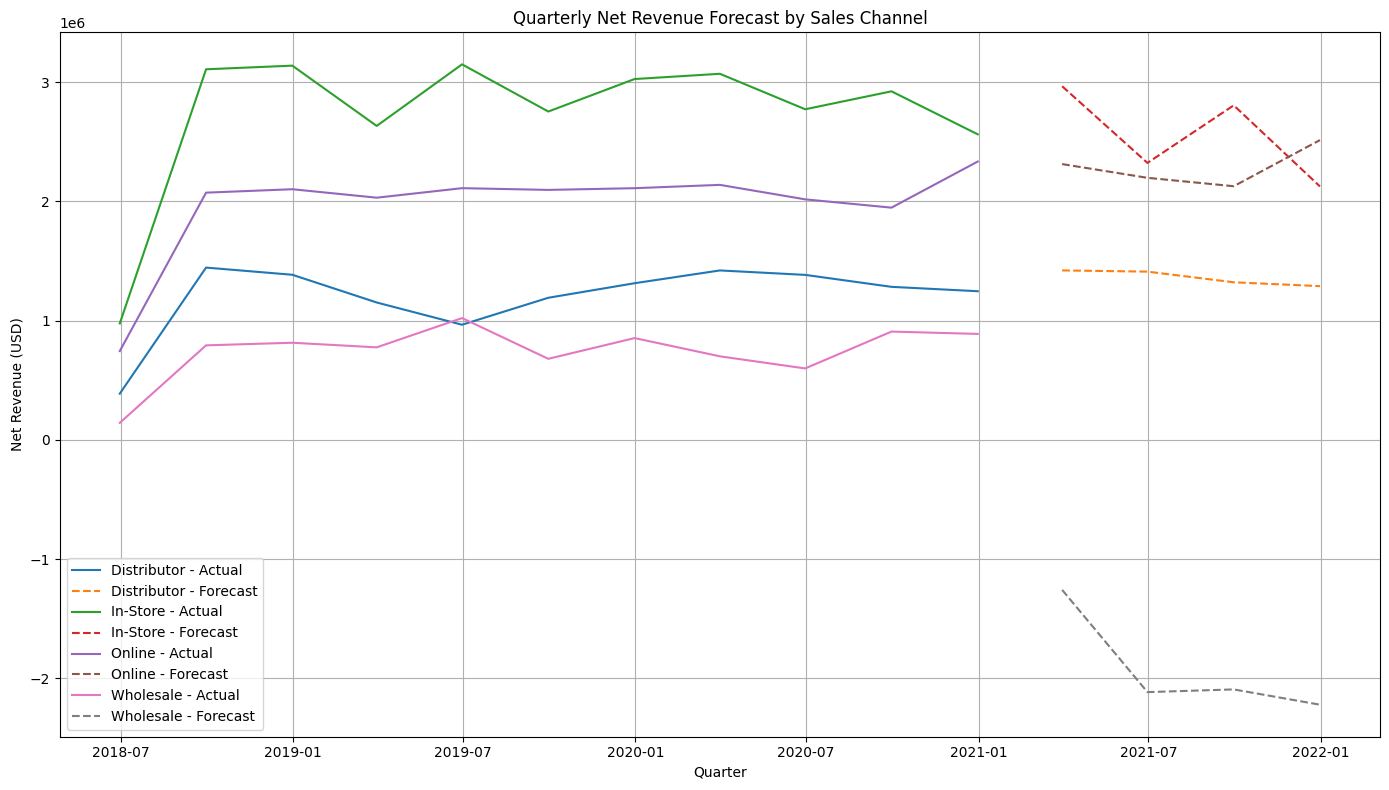

In [19]:
file_path = '/content/drive/MyDrive/Applied AI_allWomen Tech/Module 3_Final Project/Data/Copy of US_Regional_Sales_Data.xlsx'

# Run the forecasting prototype
sales_df = load_and_prepare_data(file_path)
quarterly_df = aggregate_quarterly_revenue(sales_df)
forecast_dict = forecast_by_channel(quarterly_df, steps=4)
plot_forecast_results(quarterly_df, forecast_dict)

# Train test split

Now, let's do the same thing but with a train and test split, so we can obrain **performance metrics**.

In [21]:
file_path = '/content/drive/MyDrive/Applied AI_allWomen Tech/Module 3_Final Project/Data/Copy of US_Regional_Sales_Data.xlsx'

# Run the forecasting prototype
sales_df = load_and_prepare_data(file_path)
quarterly_df = aggregate_quarterly_revenue(sales_df)

<ipython-input-15-789a5c70e73e>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  .groupby([pd.Grouper(key='OrderDate', freq='Q'), 'Sales Channel'])['Net Revenue']


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ip

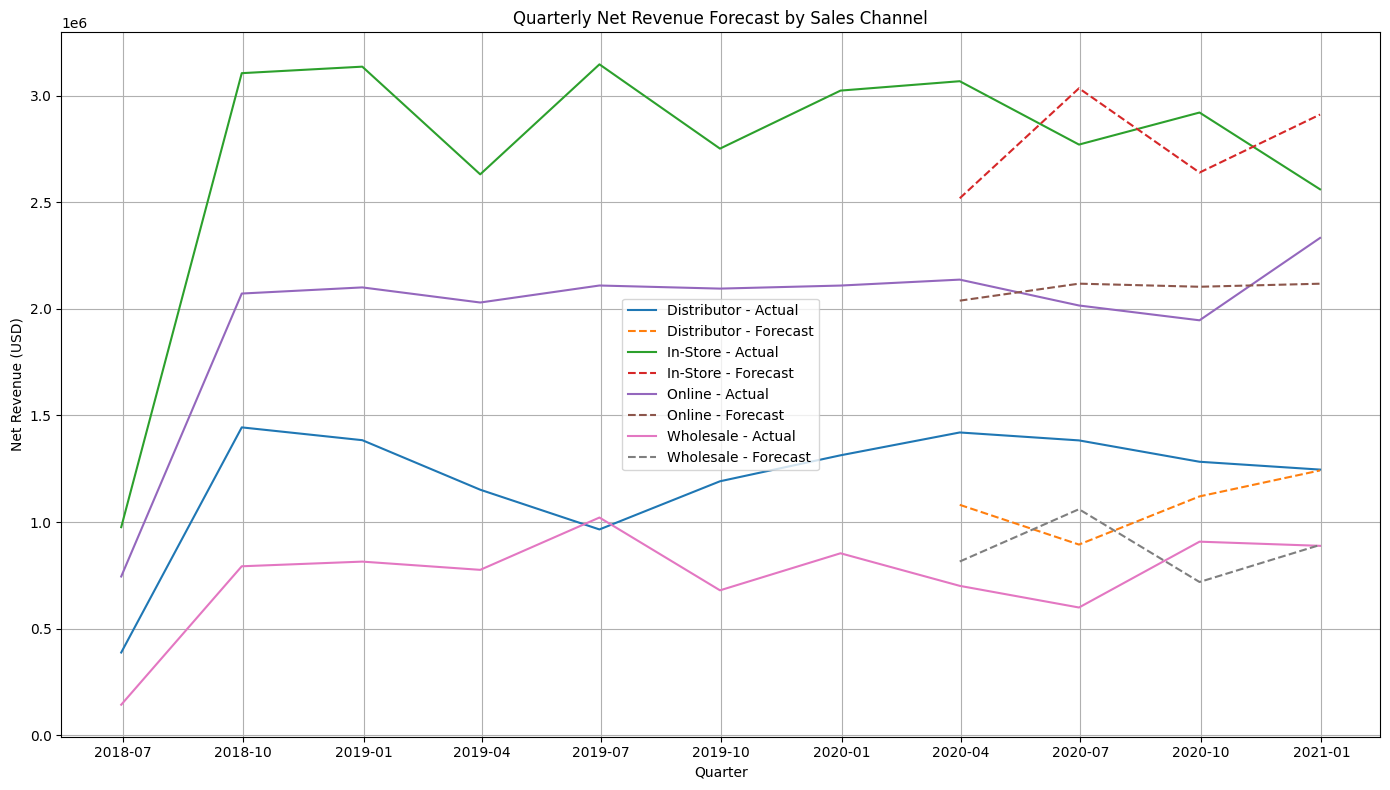

In [29]:
# Train - test split
train_quarterly_df = quarterly_df[quarterly_df["OrderDate"]<"2020-01-01"]
test_quarterly_df = quarterly_df[quarterly_df["OrderDate"]>="2020-01-01"]

# Let's get the forecast using train dataset
forecast_dict = forecast_by_channel(train_quarterly_df, steps=4)
plot_forecast_results(quarterly_df, forecast_dict)

Conclusion: The plot is identical with Prophet, due to lack of aggregation of promotional-seasonality data.

In [30]:
forecast_dict.keys()

dict_keys(['Distributor', 'In-Store', 'Online', 'Wholesale'])

In [38]:
forecast_df = pd.DataFrame(columns = ["OrderDate", "Net Revenue predicted", "Sales Channel"])
for key in forecast_dict.keys():
  df = forecast_dict[key].reset_index().rename(columns={"index":"OrderDate", 0:"Net Revenue predicted"})
  df["Sales Channel"] = key
  forecast_df = pd.concat([forecast_df, df])
forecast_df

<ipython-input-38-2c266d618fac>:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_df = pd.concat([forecast_df, df])


,OrderDate,Net Revenue predicted,Sales Channel
0,2020-03-31,1.080630e+06,Distributor
1,2020-06-30,8.941390e+05,Distributor
2,2020-09-30,1.120205e+06,Distributor
3,2020-12-31,1.242116e+06,Distributor
0,2020-03-31,2.519658e+06,In-Store
1,2020-06-30,3.035951e+06,In-Store
2,2020-09-30,2.640366e+06,In-Store
3,2020-12-31,2.912768e+06,In-Store
0,2020-03-31,2.039026e+06,Online
1,2020-06-30,2.118839e+06,Online


In [32]:
test_quarterly_df

,OrderDate,Sales Channel,Net Revenue
28,2020-03-31,Distributor,1.420344e+06
29,2020-03-31,In-Store,3.069146e+06
30,2020-03-31,Online,2.137810e+06
31,2020-03-31,Wholesale,7.003008e+05
35,2020-06-30,Wholesale,5.986934e+05
34,2020-06-30,Online,2.016340e+06
33,2020-06-30,In-Store,2.771713e+06
32,2020-06-30,Distributor,1.383102e+06
36,2020-09-30,Distributor,1.282856e+06
37,2020-09-30,In-Store,2.922125e+06


In [40]:
#create a copy
test_quarterly_df = test_quarterly_df.copy()
test_quarterly_df["OrderDate"] = pd.to_datetime(test_quarterly_df["OrderDate"])


In [41]:
#manually compute RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE manually
mse = mean_squared_error(combined_df["Net Revenue actual"], combined_df["Net Revenue predicted"])
rmse = np.sqrt(mse)


In [47]:
#final working code
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Fix SettingWithCopyWarning
test_quarterly_df = test_quarterly_df.copy()

# Ensure datetime formats
forecast_df["OrderDate"] = pd.to_datetime(forecast_df["OrderDate"])
test_quarterly_df["OrderDate"] = pd.to_datetime(test_quarterly_df["OrderDate"])

# Rename actuals
test_renamed = test_quarterly_df.rename(columns={"Net Revenue": "Net Revenue actual"})

# Merge
combined_df = pd.merge(forecast_df, test_renamed, on=["OrderDate", "Sales Channel"])

# Calculate RMSE manually
mse = mean_squared_error(combined_df["Net Revenue actual"], combined_df["Net Revenue predicted"])
rmse = np.sqrt(mse)

combined_df["error"] = abs(combined_df["Net Revenue actual"] - combined_df["Net Revenue predicted"])
combined_df["error_perc"] = 100*(combined_df["error"] / combined_df["Net Revenue actual"])
# Optional: view result

print(f"\nRoot Mean Square Error (RMSE): {rmse:,.2f}")
combined_df

combined_df["error_perc"].mean()


Root Mean Square Error (RMSE): 285,970.07


np.float64(16.54831066118525)

# ANNEX - Prophet-model


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet